## Loading/Transforming Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
%matplotlib inline

In [13]:
train_data = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_data = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

In [14]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels.shape


(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [15]:
x_train = train_data.reshape(-1, 784)
y_train = train_labels
x_test = test_data.reshape(-1, 784)
y_test = test_labels

In [16]:
x_train[:,0].shape

(60000,)

In [17]:
print(x_train.shape)
print(y_train.shape)
    
print(x_test.shape)
y_test.shape

(60000, 784)
(60000,)
(10000, 784)


(10000,)

In [19]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
x_norm = x_train/255
x_test_norm = x_test/255

In [21]:
df_mapping =  pd.read_csv('kmnist_classmap.csv')

In [37]:
#new_array = np.stack(x_train, y_train)
#new_array

df_labels = pd.DataFrame({'index':y_train})

In [38]:
#new_array = np.stack(x_train, y_train)
#new_array

df_label_mapping = pd.merge(df_mapping,df_labels, how = 'left', on='index')

In [42]:
df_lm = df_label_mapping 

## Data Visualizaiton

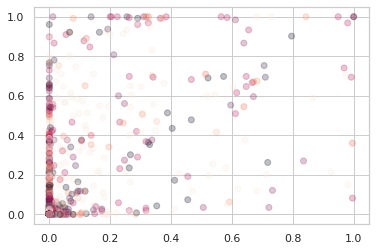

In [22]:
plt.figure()
plt.scatter(x_norm[:,0], x_norm[:,1], c = y_train, alpha = 0.25)

In [49]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(train_labels.target[i]))

SyntaxError: invalid syntax (<ipython-input-49-be420d67809f>, line 7)

NameError: name 'images' is not defined

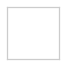

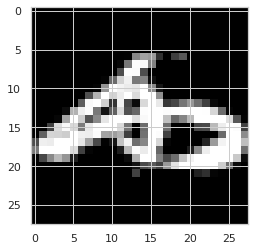

In [50]:
# pick a sample to plot
sample = 1
image = train_data[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

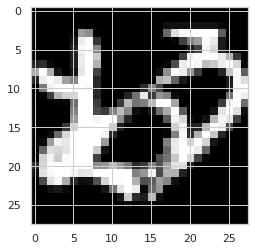

In [51]:
# pick a sample to plot
sample = 2
image = train_data[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [53]:
num = 10
images = train_data[:num]
labels = train_labels[:num]

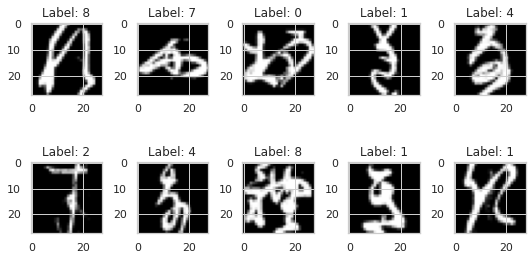

In [55]:
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'target'

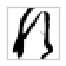

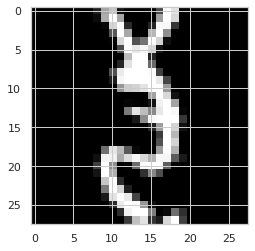

In [56]:
# pick a sample to plot
sample = 3
image = train_data[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
import pandas as pd
df_accuracy  = pd.DataFrame(
                {"Model Type": ['Naive Bayes', 'Bayes Gaussian' ,'Bernoulli', 'KNN'  ],
                 "Best Recorded Accuracy": ['20%', '76%','51%','93%' ],
                 "Conditions of Best recording": ['Non normailized','Normalized. Epsilon value at .1','Normalized','Cosine similarity']
                })

In [6]:
df_accuracy

,Model Type,Best Recorded Accuracy,Conditions of Best recording
0,Naive Bayes,20%,Non normailized
1,Bayes Gaussian,76%,Normalized. Epsilon value at .1
2,Bernoulli,51%,Normalized
3,KNN,93%,Cosine similarity


In [7]:
import pandas as pd
df_accuracy_num  = pd.DataFrame(
                {"Model Type": ['Naive Bayes', 'Bayes Gaussian' ,'Bernoulli', 'KNN'  ],
                 "Best Recorded Accuracy": [.20, .76,.51,.93 ],
                 "Conditions of Best recording": ['Non normailized','Normalized. Epsilon value at .1','Normalized','Cosine similarity']
                })

In [8]:
df_accuracy_num

,Model Type,Best Recorded Accuracy,Conditions of Best recording
0,Naive Bayes,0.20,Non normailized
1,Bayes Gaussian,0.76,Normalized. Epsilon value at .1
2,Bernoulli,0.51,Normalized
3,KNN,0.93,Cosine similarity


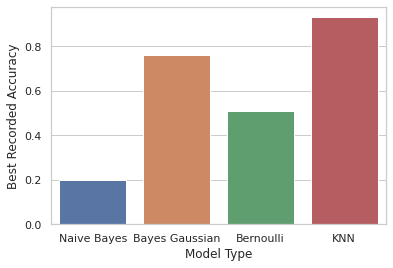

In [11]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Model Type", y="Best Recorded Accuracy", data=df_accuracy_num)

## Modelling

### Naive Bayes Gauss

In [57]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [58]:
gnb = GaussNB()
gnb.fit(x_norm,y_train)
y_hat = gnb.predict(x_test_norm)

In [60]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [61]:
print(f"Accuracy: {accuracy(y_test, y_hat):0.3f}")

Accuracy: 0.479


In [ ]:
### Gauss Bayes

In [62]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [63]:
GB = GaussBayes()
GB.fit(x_norm,y_train)
y2_hat = GB.predict(x_test_norm)

In [64]:
print(f"Accuracy: {accuracy(y_test, y2_hat):0.3f}")

Accuracy: 0.630


In [65]:
GB = GaussBayes()
GB.fit(x_norm,y_train, epsilon=1e-1)
y6_hat = GB.predict(x_test_norm)

In [66]:
print(f"Accuracy: {accuracy(y_test, y6_hat):0.3f}")

Accuracy: 0.768


In [67]:
GB = GaussBayes()
GB.fit(x_norm,y_train, epsilon=1e1)
y7_hat = GB.predict(x_test_norm)

In [68]:
print(f"Accuracy: {accuracy(y_test, y7_hat):0.3f}")

Accuracy: 0.509


In [69]:
class GenGaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X,DistFam):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = DistFam(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [70]:
def DSel(dstring):
    if dstring=="Gauss" or dstring== "Gaussian" or dstring=="gauss" or dstring=="gaussian":return mvn.logpdf
    if dstring=="multi" or dstring== "Multinomial" or dstring=="multinomial" or dstring=="Multi":return mlvn.logpmf   



In [71]:

my_dist=mvn.logpdf
GGB = GenGaussBayes()
GGB.fit(x_norm,y_train, epsilon=1e-1)
y8_hat = GGB.predict(x_test_norm,DSel("gauss"))

In [72]:
print(f"Accuracy: {accuracy(y_test, y8_hat):0.3f}")

Accuracy: 0.768


### Multi 

Did not work

In [ ]:
### Bernului 

In [73]:
class BernNB():
  def fit(self, X, y, epsilon = 1e-2):
    N, D = X.shape
    self.likelihoods = {}
    self.priors = {}
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      p = (sum(X_k)+1) / (len(X_k)+2)
      self.likelihoods[k] = {'mean': p, 'cov': p * (1 - p) + epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      # Using the Bernoulli funtion/formula. Trick is to get the matrices/vectors to go from mxn to a 1x1 number for each k value.
      P_hat[:,k] = np.log(self.priors[k]) + np.matmul(X, np.log(l['mean'])) + np.matmul((1 - X), np.log(abs(1-l['mean'])))

    return P_hat.argmax(axis =1)

In [74]:

bnb = BernNB()
bnb.fit(x_norm,y_train) # Use the X and Y Training set here
yb_hat = bnb.predict(x_test_norm) # Use the X Test here
print(accuracy(y_test, yb_hat))

0.5124


In [ ]:
cos_sim = dot(x_train[:,0], y_train)/(norm(x_train[:,0])*norm(y_train))
cos_sim

In [34]:

import heapq
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, confusion_matrix






In [27]:
from numpy import dot
from numpy.linalg import norm

#cos_sim = dot(a, b)/(norm(a)*norm(b))

In [35]:
def cos_knn(k, test_data, test_target, stored_data, stored_target):
    """k: number of neighbors to use for voting
    test_data: a set of unobserved images to classify
    test_target: the labels for the test_data (for calculating accuracy)
    stored_data: the images already observed and available to the model
    stored_target: labels for stored_data
    """
    
    # find similarity for every point in test_data between every other point in stored_data
    cosim = cosine_similarity(test_data, stored_data)
    
    # get indices of images in stored_data that are most similar to any given test_data point
    top = [(heapq.nlargest((k+1), range(len(i)), i.take)) for i in cosim]
    # convert indices to numbers
    top = [[stored_target[j] for j in i[:k]] for i in top]
    
    # vote, and return prediction for every image in test_data
    pred = [max(set(i), key=i.count) for i in top]
    pred = np.array(pred)
    
    # print table giving classifier accuracy using test_target
    print(classification_report(test_target, pred))

In [45]:
df_lm.describe()

,index
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [47]:
df_lm['index'][0]

0

In [48]:
df_mapping

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [36]:
%%time
cos_knn(5, x_test,y_test, x_train, y_train)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.96      0.89      0.93      1000
           2       0.91      0.88      0.89      1000
           3       0.92      0.98      0.95      1000
           4       0.94      0.90      0.92      1000
           5       0.96      0.94      0.95      1000
           6       0.88      0.97      0.92      1000
           7       0.95      0.94      0.95      1000
           8       0.89      0.95      0.92      1000
           9       0.96      0.91      0.93      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

CPU times: user 5min 34s, sys: 20.9 s, total: 5min 55s
Wall time: 4min 53s
